# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from pptx import Presentation
from pptx.util import Inches

%matplotlib inline

In [2]:
# Set display options to show more columns
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None) 

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | BA, after subsequent delays and postponed departure times, from the initial 20:35 to 23:00, as passengers had been gathering at the already assigned gate, crew was ready to board and aircraft ready outside, decided to cancel the flight. Reason provided over the intercom: absence of pilots. All passengers were told that no hotels could be booked for them and that everyone was on their own (note this, there’ll be a follow up). Rage mounted amongst us all, but the Brits to whom all can be done without response. Myself and others had all reasons to insist and so we did, till 1 AM. The crew kept saying that no rebooking was possible apart from the automated one (which expected us to cross Europe to get to our destination) and no hotel booking were in their power either. Well: liars. After hours of pushing and raging, one person came with the hotel bookings for roughly those 30 of us who kept on fighting. Liars also for another reason: all but one angel told us there was no way to be rebooked. But one took me apart and suggested me a way, which worked. It meant breaking some of their “rules” but after all they made the mess, so they had to sort it out. With 3 hours of sleep over 24 hours I managed to get back where I had to and I’m 100% committed to now avoid BA as much I shall be able to. Some of the clerks told me it was impossible working for them after all the cuts to save on money, as the company runs in pretty bad financial waters. Hubs such as Heathrow now have almost no presence and passengers have to do all by themselves, from checking in their bags at the bag drops to spending hours on their phones at their expenses when BA messes it up as it frequently does lately. It’s a pity to be seeing such a decay, time to change leadership team and CEO."
1,"Not Verified | It is embarrassing to have the word “British” attached to this airline. The service was substandard in every way with the possible exception of food and a couple of stand out staff. I can accept delays and technical problems, they happen. How they handled it was, in my opinion, was not responsible - they left everyone on the plane for 4 hours and at midnight, disembarked saying they had no hotels available and no staff to unload luggage. The plane inevitable had people with young children and elderly. All left to fend for themselves! Several times they mentioned “don’t worry, we have a duty of care” but there really was none. Singapore to London flight was not wifi enabled and they cram 8 business class seats across the width. Comfort and service did not reflect price and was well below leading airlines - avoid it at all cost!"
2,"✅ Trip Verified | Flight cancelled due to bad weather, BA contacted me by email immediately and provided an alternative booking as well as a link if their suggestion for a different flight wasn't convenient. Clicked on the link and was assisted promptly by a service rep who rebooked me and sent all details within a few minutes. Great customer service from BA....well done."
3,"✅ Trip Verified | British Airways oversold my LHR to LAX flight; I booked months in advance paid in full and actually paid over $1000 extra to fly their Airbus A380. Tried to check in online day before flight, got unknown system error couldn’t check in. Arrived at LHR 3.5 hours early; none of BA kiosks worked, all manual check in by understaffed BA staff who were all unhelpful. Insane queue times; lots of other frustrated passengers in line. Denied boarding at the gate because flight oversold, no explanations, no apologies, constantly ignored by BA staff who don’t have the patience to listen to your situation or be helpful. Finally gate manager books alternate flight to Paris CDG, supposedly to connect with an Air France flight. We get to CDG only to be told by Air France their flight was full; no idea why BA manager bumped me to AF flight that’s also full! That’s insult to injury to be bumped twice! Went to BA desk at CDG, no help at al

In [5]:
# Define the directory and file path
base_directory = r"C:\Users\clain\OneDrive\Documents\Job Hunting\data"
file_name = "BA_reviews.csv"
file_path = os.path.join(base_directory, "BA_reviews.csv")

# Check if the directory exists
if not os.path.exists(base_directory):
    # Create the directory if it does not exist
    os.makedirs(base_directory)

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

File saved to C:\Users\clain\OneDrive\Documents\Job Hunting\data\BA_reviews.csv


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
data = pd.read_csv("BA_reviews.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3831 entries, 0 to 3830
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3831 non-null   object
dtypes: object(1)
memory usage: 30.1+ KB


In [7]:
data.columns

Index(['reviews'], dtype='object')

In [8]:
# Function to extract verification status
def extract_verification_status(text):
    if '✅ Trip Verified |' in text:
        return 'Verified'
    elif 'Not Verified |' in text:
        return 'Not Verified'
    return 'Unknown'

# Apply the function to create a new column
df['Verification'] = data['reviews'].apply(extract_verification_status)

# Remove the verification status from the text
df['Comments'] = data['reviews'].apply(lambda x: re.sub(r'✅ Trip Verified \| |Not Verified \| ', '', x))

# Check the updated DataFrame
df.head()

,reviews,Verification,Comments
0,"✅ Trip Verified | BA, after subsequent delays and postponed departure times, from the initial 20:35 to 23:00, as passengers had been gathering at the already assigned gate, crew was ready to board and aircraft ready outside, decided to cancel the flight. Reason provided over the intercom: absence of pilots. All passengers were told that no hotels could be booked for them and that everyone was on their own (note this, there’ll be a follow up). Rage mounted amongst us all, but the Brits to whom all can be done without response. Myself and others had all reasons to insist and so we did, till 1 AM. The crew kept saying that no rebooking was possible apart from the automated one (which expected us to cross Europe to get to our destination) and no hotel booking were in their power either. Well: liars. After hours of pushing and raging, one person came with the hotel bookings for roughly those 30 of us who kept on fighting. Liars also for another reason: all but one angel told us there was no way to be rebooked. But one took me apart and suggested me a way, which worked. It meant breaking some of their “rules” but after all they made the mess, so they had to sort it out. With 3 hours of sleep over 24 hours I managed to get back where I had to and I’m 100% committed to now avoid BA as much I shall be able to. Some of the clerks told me it was impossible working for them after all the cuts to save on money, as the company runs in pretty bad financial waters. Hubs such as Heathrow now have almost no presence and passengers have to do all by themselves, from checking in their bags at the bag drops to spending hours on their phones at their expenses when BA messes it up as it frequently does lately. It’s a pity to be seeing such a decay, time to change leadership team and CEO.",Verified,"BA, after subsequent delays and postponed departure times, from the initial 20:35 to 23:00, as passengers had been gathering at the already assigned gate, crew was ready to board and aircraft ready outside, decided to cancel the flight. Reason provided over the intercom: absence of pilots. All passengers were told that no hotels could be booked for them and that everyone was on their own (note this, there’ll be a follow up). Rage mounted amongst us all, but the Brits to whom all can be done without response. Myself and others had all reasons to insist and so we did, till 1 AM. The crew kept saying that no rebooking was possible apart from the automated one (which expected us to cross Europe to get to our destination) and no hotel booking were in their power either. Well: liars. After hours of pushing and raging, one person came with the hotel bookings for roughly those 30 of us who kept on fighting. Liars also for another reason: all but one angel told us there was no way to be rebooked. But one took me apart and suggested me a way, which worked. It meant breaking some of their “rules” but after all they made the mess, so they had to sort it out. With 3 hours of sleep over 24 hours I managed to get back where I had to and I’m 100% committed to now avoid BA as much I shall be able to. Some of the clerks told me it was impossible working for them after all the cuts to save on money, as the company runs in pretty bad financial waters. Hubs such as Heathrow now have almost no presence and passengers have to do all by themselves, from checking in their bags at the bag drops to spending hours on their phones at their expenses when BA messes it up as it frequently does lately. It’s a pity to be seeing such a decay, time to change leadership team and CEO."
1,"Not Verified | It is embarrassing to have the word “British” attached to this airline. The service was substandard in every way with the possible exception of food and a couple of stand out staff. I can accept delays and technical problems, they happen. How they handled it was, in my opinion, was not responsible - they left everyone on the plane for 4 hours and at midnight, 

In [9]:
# Remove the reviews column
df = df.drop(columns=['reviews'])

df.head(2)

,Verification,Comments
0,Verified,"BA, after subsequent delays and postponed departure times, from the initial 20:35 to 23:00, as passengers had been gathering at the already assigned gate, crew was ready to board and aircraft ready outside, decided to cancel the flight. Reason provided over the intercom: absence of pilots. All passengers were told that no hotels could be booked for them and that everyone was on their own (note this, there’ll be a follow up). Rage mounted amongst us all, but the Brits to whom all can be done without response. Myself and others had all reasons to insist and so we did, till 1 AM. The crew kept saying that no rebooking was possible apart from the automated one (which expected us to cross Europe to get to our destination) and no hotel booking were in their power either. Well: liars. After hours of pushing and raging, one person came with the hotel bookings for roughly those 30 of us who kept on fighting. Liars also for another reason: all but one angel told us there was no way to be rebooked. But one took me apart and suggested me a way, which worked. It meant breaking some of their “rules” but after all they made the mess, so they had to sort it out. With 3 hours of sleep over 24 hours I managed to get back where I had to and I’m 100% committed to now avoid BA as much I shall be able to. Some of the clerks told me it was impossible working for them after all the cuts to save on money, as the company runs in pretty bad financial waters. Hubs such as Heathrow now have almost no presence and passengers have to do all by themselves, from checking in their bags at the bag drops to spending hours on their phones at their expenses when BA messes it up as it frequently does lately. It’s a pity to be seeing such a decay, time to change leadership team and CEO."
1,Not Verified,"Not Verified | It is embarrassing to have the word “British” attached to this airline. The service was substandard in every way with the possible exception of food and a couple of stand out staff. I can accept delays and technical problems, they happen. How they handled it was, in my opinion, was not responsible - they left everyone on the plane for 4 hours and at midnight, disembarked saying they had no hotels available and no staff to unload luggage. The plane inevitable had people with young children and elderly. All left to fend for themselves! Several times they mentioned “don’t worry, we have a duty of care” but there really was none. Singapore to London flight was not wifi enabled and they cram 8 business class seats across the width. Comfort and service did not reflect price and was well below leading airlines - avoid it at all cost!"


In [10]:
# Tokenization, Stop Words Removal, Lemmatization
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\clain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\clain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\clain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
# Function to clean text
def clean_text(text):
    # Lowercase text
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into string
    cleaned_text = ' '.join(tokens)
    return cleaned_text


In [12]:
# Apply text cleaning to DataFrame
df['cleaned_Comments'] = df['Comments'].apply(clean_text)

df

,Verification,Comments,cleaned_Comments
0,Verified,"BA, after subsequent delays and postponed departure times, from the initial 20:35 to 23:00, as passengers had been gathering at the already assigned gate, crew was ready to board and aircraft ready outside, decided to cancel the flight. Reason provided over the intercom: absence of pilots. All passengers were told that no hotels could be booked for them and that everyone was on their own (note this, there’ll be a follow up). Rage mounted amongst us all, but the Brits to whom all can be done without response. Myself and others had all reasons to insist and so we did, till 1 AM. The crew kept saying that no rebooking was possible apart from the automated one (which expected us to cross Europe to get to our destination) and no hotel booking were in their power either. Well: liars. After hours of pushing and raging, one person came with the hotel bookings for roughly those 30 of us who kept on fighting. Liars also for another reason: all but one angel told us there was no way to be rebooked. But one took me apart and suggested me a way, which worked. It meant breaking some of their “rules” but after all they made the mess, so they had to sort it out. With 3 hours of sleep over 24 hours I managed to get back where I had to and I’m 100% committed to now avoid BA as much I shall be able to. Some of the clerks told me it was impossible working for them after all the cuts to save on money, as the company runs in pretty bad financial waters. Hubs such as Heathrow now have almost no presence and passengers have to do all by themselves, from checking in their bags at the bag drops to spending hours on their phones at their expenses when BA messes it up as it frequently does lately. It’s a pity to be seeing such a decay, time to change leadership team and CEO.",ba subsequent delay postponed departure time initial passenger gathering already assigned gate crew ready board aircraft ready outside decided cancel flight reason provided intercom absence pilot passenger told hotel could booked everyone note therell follow rage mounted amongst u brit done without response others reason insist till crew kept saying rebooking possible apart automated one expected u cross europe get destination hotel booking power either well liar hour pushing raging one person came hotel booking roughly u kept fighting liar also another reason one angel told u way rebooked one took apart suggested way worked meant breaking rule made mess sort hour sleep hour managed get back im committed avoid ba much shall able clerk told impossible working cut save money company run pretty bad financial water hub heathrow almost presence passenger checking bag bag drop spending hour phone expense ba mess frequently lately pity seeing decay time change leadership team ceo
1,Not Verified,"Not Verified | It is embarrassing to have the word “British” attached to this airline. The service was substandard in every way with the possible exception of food and a couple of stand out staff. I can accept delays and technical problems, they happen. How they handled it was, in my opinion, was not responsible - they left everyone on the plane for 4 hours and at midnight, disembarked saying they had no hotels available and no staff to unload luggage. The plane inevitable had people with young children and elderly. All left to fend for themselves! Several times they mentioned “don’t worry, we have a duty of care” but there really was none. Singapore to London flight was not wifi enabled and they cram 8 business class seats across the width. Comfort and service did not reflect price and was well below leading airlines - avoid it at all cost!",verified embarrassing word british attached airline service substandard every way possible exception food couple stand staff accept delay technical problem happen handled opinion responsible left everyone plane hour midnight disembarked saying hotel available staff unload luggage plane inevitable people young

In [13]:
df_clean = df.drop(columns="Comments")

df_clean.head(3)

,Verification,cleaned_Comments
0,Verified,ba subsequent delay postponed departure time initial passenger gathering already assigned gate crew ready board aircraft ready outside decided cancel flight reason provided intercom absence pilot passenger told hotel could booked everyone note therell follow rage mounted amongst u brit done without response others reason insist till crew kept saying rebooking possible apart automated one expected u cross europe get destination hotel booking power either well liar hour pushing raging one person came hotel booking roughly u kept fighting liar also another reason one angel told u way rebooked one took apart suggested way worked meant breaking rule made mess sort hour sleep hour managed get back im committed avoid ba much shall able clerk told impossible working cut save money company run pretty bad financial water hub heathrow almost presence passenger checking bag bag drop spending hour phone expense ba mess frequently lately pity seeing decay time change leadership team ceo
1,Not Verified,verified embarrassing word british attached airline service substandard every way possible exception food couple stand staff accept delay technical problem happen handled opinion responsible left everyone plane hour midnight disembarked saying hotel available staff unload luggage plane inevitable people young child elderly left fend several time mentioned dont worry duty care really none singapore london flight wifi enabled cram business class seat across width comfort service reflect price well leading airline avoid cost
2,Verified,flight cancelled due bad weather ba contacted email immediately provided alternative booking well link suggestion different flight wasnt convenient clicked link assisted promptly service rep rebooked sent detail within minute great customer service bawell done


In [14]:
# Extract text data
text_data = df['cleaned_Comments'].tolist()

In [15]:
# Adjust CountVectorizer parameters
vectorizer = CountVectorizer(max_df=0.8, min_df=1, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(text_data)

In [16]:
# Perform Topic Modeling
LDA = LatentDirichletAllocation(n_components=3, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=3, random_state=42)

In [17]:
# Print topics
for idx, topic in enumerate(LDA.components_):
    print(f"Topic #{idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic #0:
['time', 'airline', 'told', 'service', 'london', 'customer', 'airway', 'british', 'hour', 'ba']
Topic #1:
['meal', 'drink', 'cabin', 'service', 'seat', 'time', 'food', 'good', 'ba', 'crew']
Topic #2:
['airway', 'airline', 'cabin', 'food', 'service', 'economy', 'business', 'class', 'ba', 'seat']


In [18]:
# Get topic distribution
topic_distributions = LDA.transform(doc_term_matrix)
topic_means = np.mean(topic_distributions, axis=0)

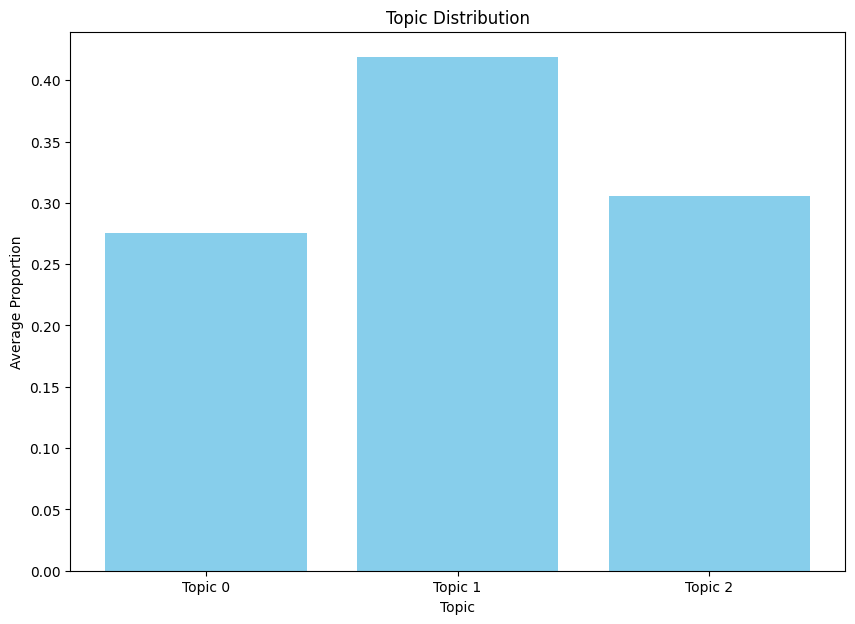

In [19]:
# Plot topic distribution
plt.figure(figsize=(10, 7))
plt.bar(range(LDA.n_components), topic_means, color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Average Proportion')
plt.title('Topic Distribution')
plt.xticks(range(LDA.n_components), [f'Topic {i}' for i in range(LDA.n_components)])
plt.show()

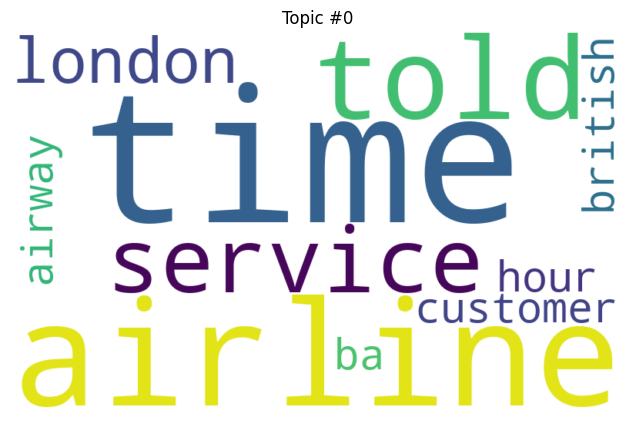

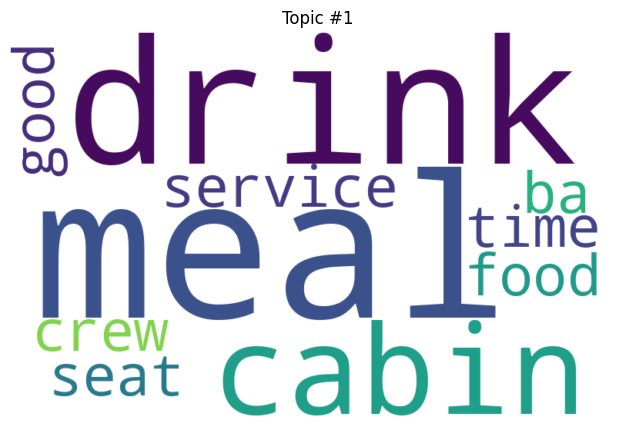

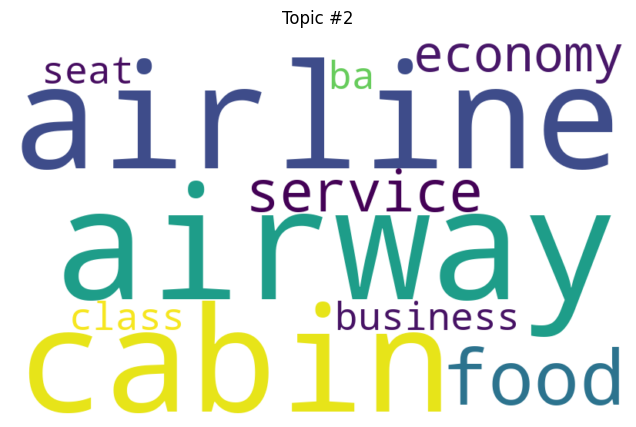

In [24]:
topics = {
    'Topic #0': ['time', 'airline', 'told', 'service', 'london', 'customer', 'airway', 'british', 'hour', 'ba'],
    'Topic #1': ['meal', 'drink', 'cabin', 'service', 'seat', 'time', 'food', 'good', 'ba', 'crew'],
    'Topic #2': ['airway', 'airline', 'cabin', 'food', 'service', 'economy', 'business', 'class', 'ba', 'seat']
}

# Create word clouds for each topic
for topic, words in topics.items():
    wordcloud = WordCloud(width=800, height=500, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(topic)
    plt.show()